# Lecture 11 - Question Answering

provided by [Stanford CS224N](https://www.youtube.com/watch?v=rmVRLeJRkl4)

---

<div class="alert alert-block alert-info">
Table of Contents: <br>
    
<ul>
    <li>1. <a href="#1.-Introduction">Introduction</a></li>
    <li>2. <a href="#2.-LSTM-Based-Question-Answering">LSTM-Based Question Answering</a></li>
    <li>3. <a href="#3.-BERT-based-Question-Answering">BERT-based Question Answering</a></li>
    <li>4. <a href="#4.-Open-Domain-Question-Answering">Open-Domain Question Answering</a></li>
    <li>5. <a href="#5.-Resource">Resource</a></li>
</ul>
</div>

# 1. Introduction

What is question answering? The goal of __question answering__ is to build a system that automatically answers questions posed by humans in a _natural language_.

Question answering can be done on structured or unstructured text. Today we focus on unstructured text. To understand and answer a question, a system must be able to comprehend the reading.

Reading comprehension and question-answering has applications in google search, personal assistants, and general intelligence in large.

__Stanford question answering dataset (SQuAD)__ is a large question-answering dataset with 100k annotated triplets of (passage, question, answer). Answers are short segments of text in the passage. It's the most popular question-answering dataset. Evaluation is done with an __exact match (EM)__ which can be 0 or 1 and __F1__ which is partial credit. Estimated human performance on SQuAD is EM = 82.3, F1 = 91.2.

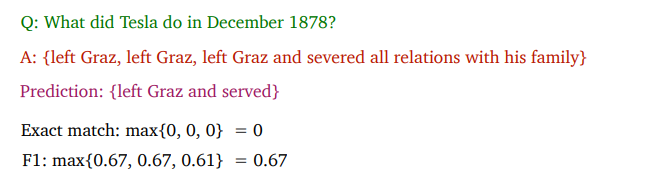 <br>
_Figure 1. SQuAD evaluation._

The problem formulation for SQuAD is shown below:

$$
Input: ~ C = (c_1, c_2, ..., c_N), Q = (q_1, q_2, ..., q_M), c_i, q_i \in V; N \approx 100, M \approx 15\\
Output: 1 \le start \le end \le N\\
$$

Approaches to this problem come in 2 forms: __LSTM-based__ methods and __BERT models__.

# 2. LSTM-Based Question Answering

The __Bidirectional Attention Flow (BiDAF)__ model is from a paper in 2017 that tackles SQuAD. 

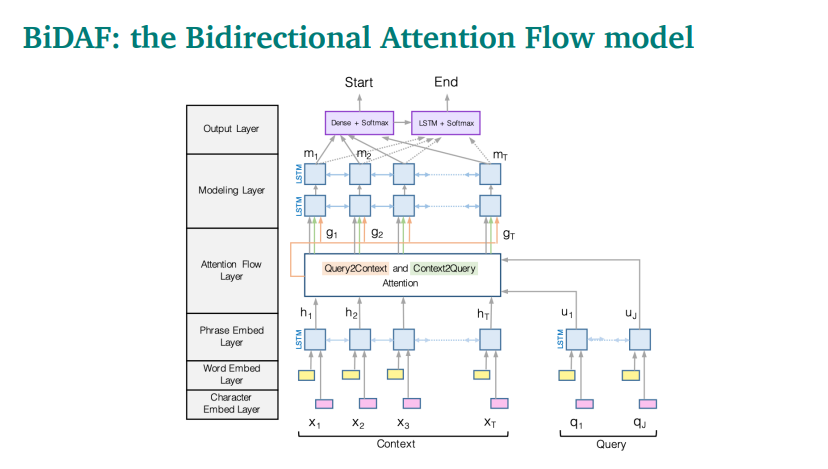 <br>
_Figure 2. BiDAF Architecture._

It concatenates word embeddings and character embeddings to be fed into 2 bidirectional LSTMs which produce contextual embeddings for both context and query. Character-level embeddings are generated through a 1D CNN. Word-level embeddings are from GloVe. The next set of layers is for the attention between the query statement and the context passage and vice versa. 

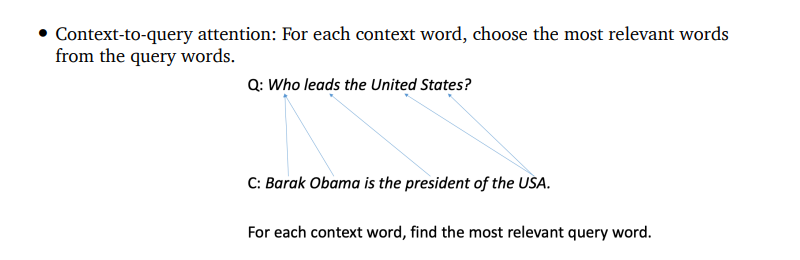 <br>
_Figure 3. Context to query attention._

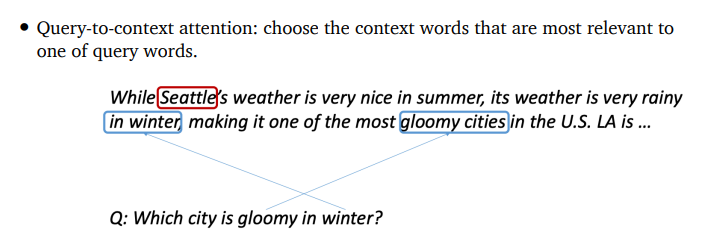 <br>
_Figure 4. Query to Context attention._

The output from the attention flow layers gets passed to more bi-directional LSTMs. These are finally passed into an output layer.

BiDAF achieves 77.3 F1 on SQuAD.

# 3. BERT-based Question Answering

BERT-based models outperform BiDAF by a ton! They leverage the BERT framework as the name suggests.

BiDAF and BERT models are fundamentally similar. They both model interactions between question and passage. BERT uses self-attention to model interactions within the passage, the question, passage and queestion, and question and passage.

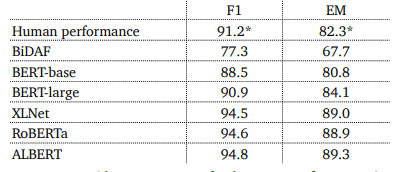 <br>
_Figure 5. BiDAF vs BERT variants on SQuAD._

Even by exceeding human performance, these models aren't perfect. They easily lose to adversarial examples. 

# 4. Open-Domain Question Answering

In Open-Domain question-answering, we don't assume a given passage, but rather, a huge corpus of documents.

In this field, we use a __retriever-reader framework__. 

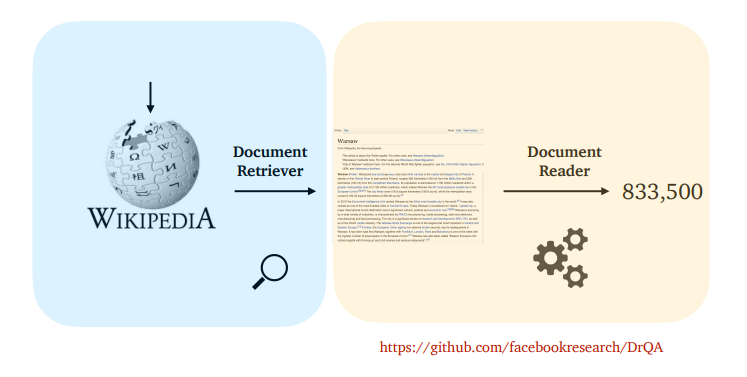 <br> 
_Figure 6. Retriever-reader framework._

The problem is formulated like this:

$$
Input: \mathcal{D} = D_1, D_2, ..., D_N ~ and ~ Q\\
Output: an ~ answer ~ string ~ A\\
$$

$$
Retriever: f(\mathcal{D}, Q) \rightarrow P_1, ..., P_K \hspace{1em} (K ~ is ~ pre-defined)\\
Reader: g(Q, \{P_1, ..., P_K\}) \rightarrow A
$$

We use a TF-IDF information-retrieval sparse model for retrieving passages. And we use a neural network for reading comprehension from the passages. 

Both the retriever and reader can be trained jointly with BERT models for both. Recent work has shown that sometimes you don't even need the retriever! T5, for example, can simply be trained to _generate_ the answers. Other work has shown that a reader model may not even be needed! Phrases and text can be densely encoded and nearest neighbors search can be ran.

# 5. Resource

If you missed the link right below the title, I'm providing the resource here again along with the course website.

- [Stanford CS224N](https://www.youtube.com/watch?v=rmVRLeJRkl4)
- [Course Website](http://web.stanford.edu/class/cs224n/)

This is a series of 23 lectures provided by Stanford.
